In [1]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
with open('teams_stat_train.pkl', 'rb') as fp:
    teams_stat_train = pickle.load(fp)
with open('teams_stat_test.pkl', 'rb') as fp:
    teams_stat_test = pickle.load(fp)
    

In [3]:
stat_train = {}
for team in teams_stat_train:
    for season in teams_stat_train[team]:
        stat_train[team + ' ' + season] = teams_stat_train[team][season]
stat_columns = ['GP', 'PPG', 'OFFR', 'DEFR', 'RPG', 'APG', 'SPG','TPG', 'FPG', 'A/TO', 'PER','FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', '2PM','2PA', '2P%', 'PPS', 'AFG%']
stat_train_df = pd.DataFrame.from_dict(data = stat_train, orient = 'index', columns = stat_columns)

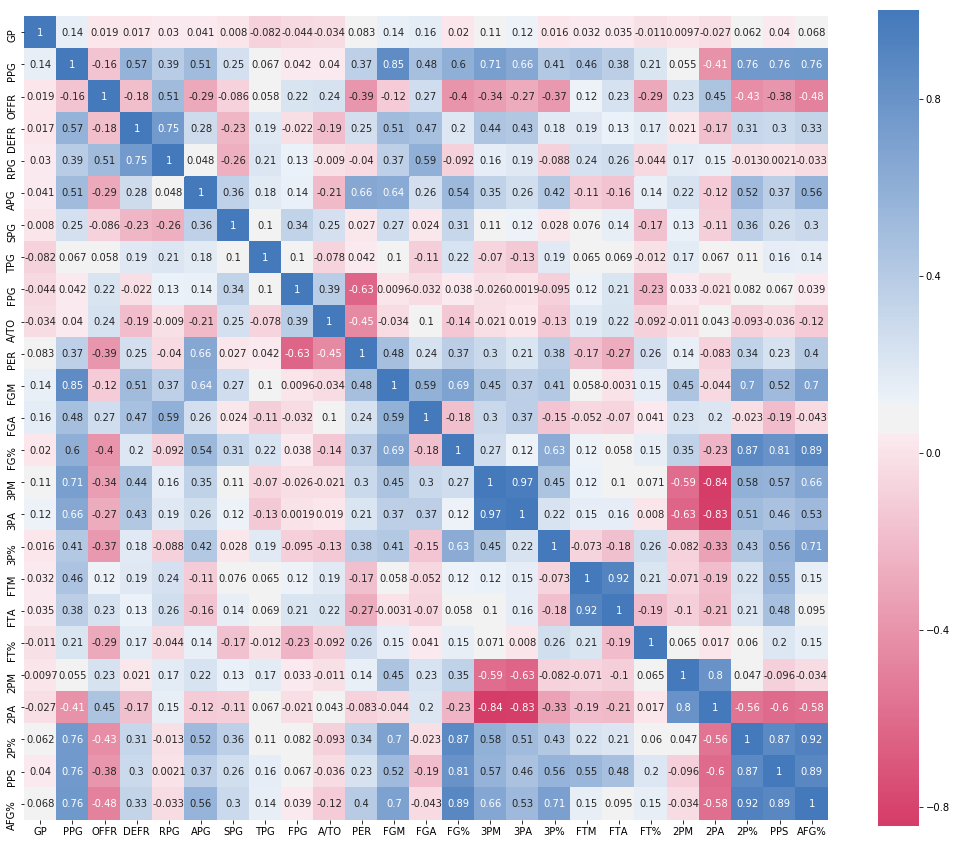

In [4]:

stat_train_df = stat_train_df.astype('float')

cmap = sns.diverging_palette(1, 250, as_cmap=True)
stat_train_df_corr = stat_train_df.corr()
f, ax = plt.subplots(figsize = (18,15))
sns.heatmap(stat_train_df_corr, square =True, cmap = cmap, annot = True, annot_kws = ())

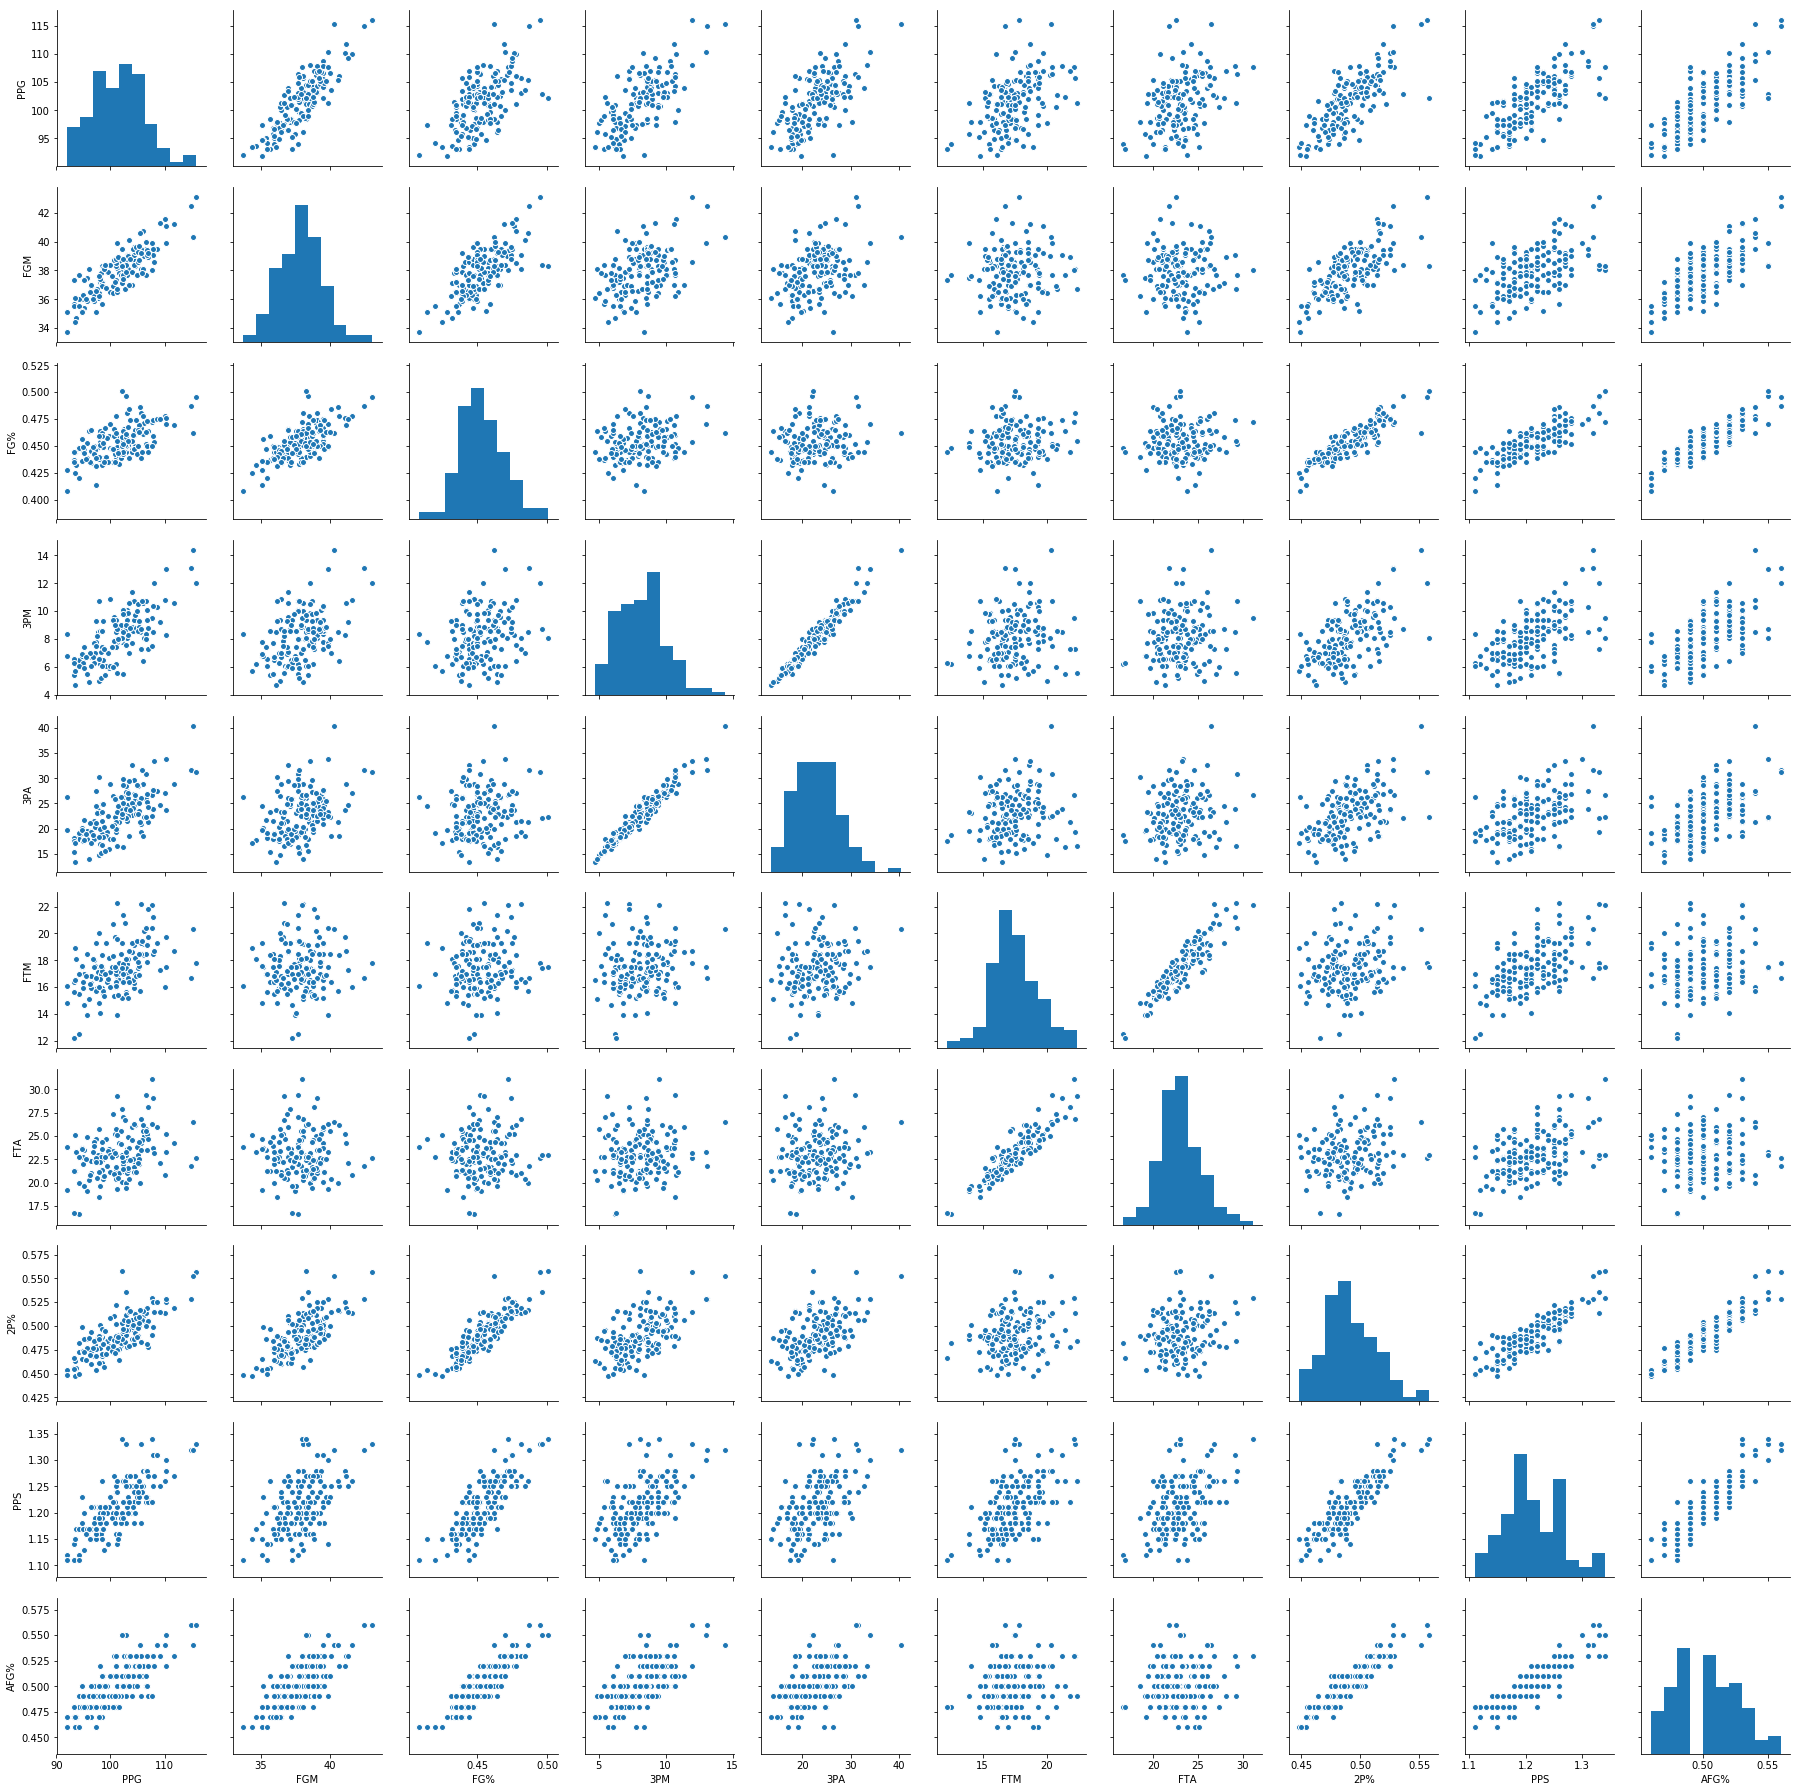

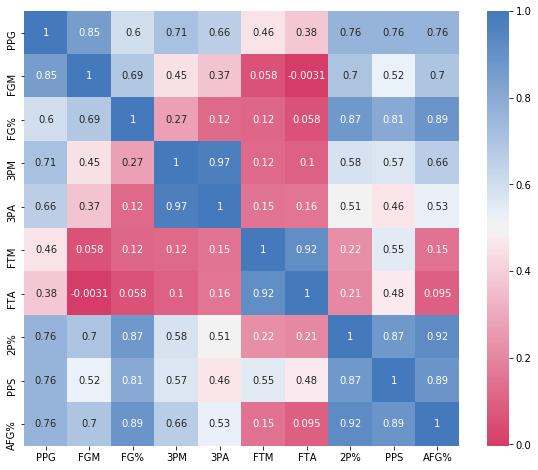

In [5]:
correlated_cols = list(stat_train_df_corr[(stat_train_df_corr > 0.85).sum( axis = 0 ) > 1].index)
corretaled_stat_corr = stat_train_df_corr[correlated_cols][stat_train_df_corr.index.isin(correlated_cols)]
sns.pairplot(stat_train_df[correlated_cols], size = 2.5)
plt.show()


f, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(corretaled_stat_corr, square =True, cmap = cmap, annot = True, annot_kws = ())
plt.show()


In [6]:
deleted_cols = ['FGM', '3PM', 'FTM', 'AFG%', '2P%','GP']
selected_cols = [col for col in stat_train_df.columns if col not in deleted_cols]

In [7]:
selected_index = []
for col in selected_cols:
    selected_index.append(list(stat_train_df.columns).index(col))
    
selected_index

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 16, 18, 19, 20, 21, 23]